# 線形回帰モデルとニューラルネットワークの比較

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
boston = load_boston()

/Users/chibakeigo/miniforge3/envs/suai/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
print("説明変数")
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df_data.shape)
display(df_data.head())

print("目的変数")
display(boston.target[:10])

説明変数
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


目的変数


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


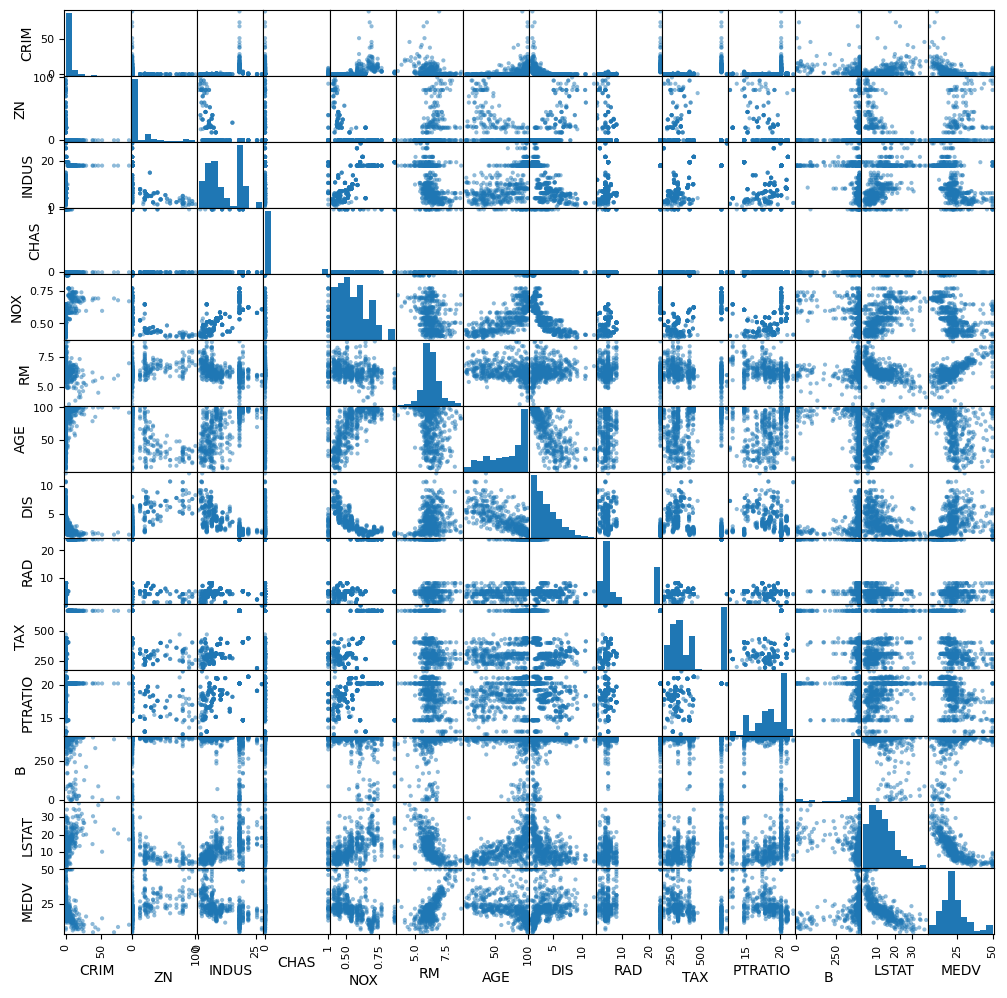

In [4]:
df = pd.concat([df_data, pd.DataFrame(boston.target, columns=["MEDV"])], axis=1)
display(df.corr().round(2))
pd.plotting.scatter_matrix(df, figsize=(12,12))
plt.show()

### データセット

In [6]:
X = df_data[["LSTAT"]].values
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,test_size=0.3,  random_state=1234)

# 標準化
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)
std = StandardScaler()
y_train = std.fit_transform(y_train.reshape(-1, 1)).reshape(1, -1)[0]
y_test = std.transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

### 線形回帰でモデリングする

In [7]:
# 学習
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

MSE= 0.4987617444520942
切片= 8.39593395566766e-17 回帰係数= [-0.73177683]


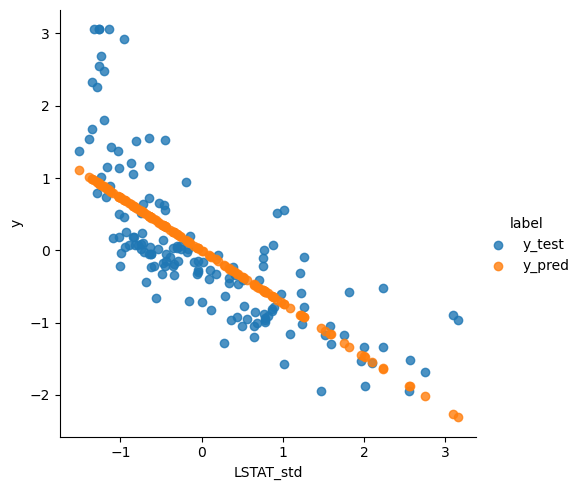

In [8]:
# 予測
y_pred =reg.predict(X_test)
df_result = pd.DataFrame(y_pred, columns=["linearRegression"])
print("MSE=",mean_squared_error(y_test, y_pred))
print("切片=", reg.intercept_, "回帰係数=", reg.coef_)

# 予測結果の描画
df1 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df1["y"] = y_test
df1["label"] = "y_test"
df2 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df2["y"] = y_pred
df2["label"] = "y_pred"
df = pd.concat([df1, df2], axis=0)

sns.lmplot(x="LSTAT_std", y="y", hue="label", data=df, fit_reg=False)
plt.show()

### ニューラルネットワークでモデリングする

In [9]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
12/12 [==============================] - 0s 8ms/step - loss: 2.0551 - mse: 2.0551 - val_loss: 1.6523 - val_mse: 1.6523
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 1.3262 - mse: 1.3262 - val_loss: 1.3415 - val_mse: 1.3415
Epoch 3/200
12/12 [==============================] - 0s 3ms/

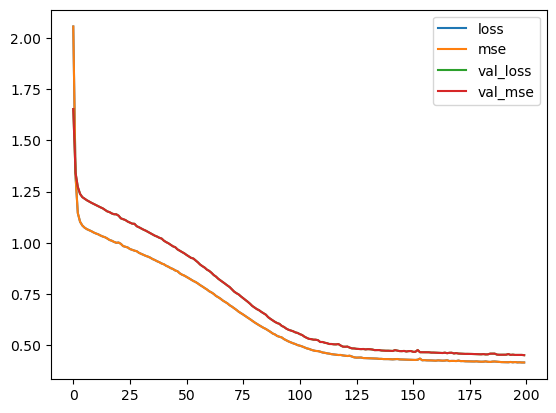

In [14]:
batch_size = 32
epochs = 200

# ネットワークの設定
#model = Sequential()
#model.add(Dense(10, activation='linear', input_shape=(1,)))
#model.add(Dense(5, activation='linear'))
#Wmodel.add(Dense(1, activation='linear')) #この活性化関数は変更してはならない

# ネットワークの設定 (非線形)
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(1,)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.summary()
model.compile(loss='mean_squared_error',
              optimizer=SGD(),
              metrics=['mse'])

# 計算
history = model.fit(X_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,     # エポック数
                    verbose=1,         # ログ出力
                    validation_data=(X_test, y_test))

# 計算過程の描画
pd.DataFrame(history.history).plot()
plt.show()


5/5 [==============================] - 0s 573us/step


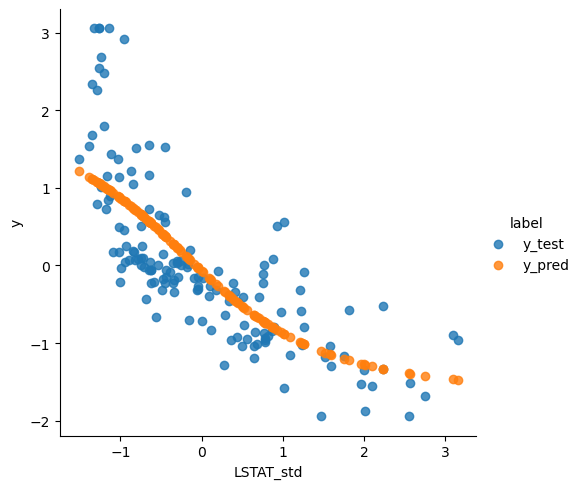

In [15]:
# 予測
y_pred = model.predict(X_test)
df_result["NN"] = y_pred

# 予測結果の描画
df1 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df1["y"] = y_test
df1["label"] = "y_test"
df2 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df2["y"] = y_pred
df2["label"] = "y_pred"
df = pd.concat([df1, df2], axis=0)

sns.lmplot(x="LSTAT_std", y="y", hue="label", data=df, fit_reg=False)
plt.show()


### [演習]
* 中間層の数を3層(ノード数は10と5)に変更してみましょう
* 中間層の活性化関数をsigmoidに変更してみましょう

5/5 [==============================] - 0s 1ms/step


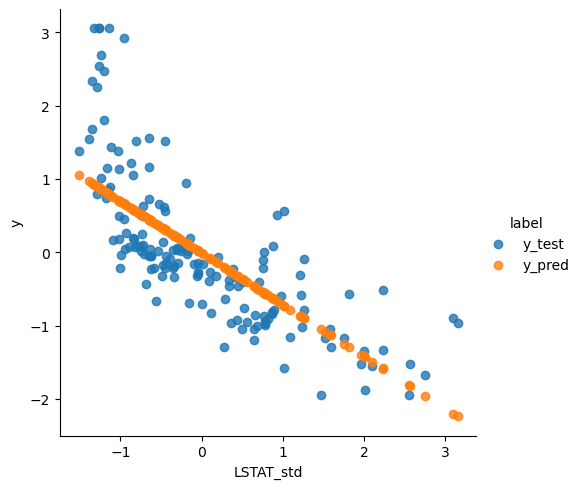

In [13]:
# 予測
y_pred = model.predict(X_test)
df_result["NN"] = y_pred

# 予測結果の描画
df1 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df1["y"] = y_test
df1["label"] = "y_test"
df2 = pd.DataFrame(X_test, index=range(len(X_test)), columns=["LSTAT_std"])
df2["y"] = y_pred
df2["label"] = "y_pred"
df = pd.concat([df1, df2], axis=0)

sns.lmplot(x="LSTAT_std", y="y", hue="label", data=df, fit_reg=False)
plt.show()
